This dataset has been retrieved from the website mavenanalytics.io. The data consist of a year's worth of sales from a fictitious pizza company that include, the date and time of each order, the type of pizza sold, the size of the pizza, the ingredients, and the quantity. 

In this project I will demonstrate how to load data into a pandas dataframe, perform any data cleaning if neccessary for analysis, transform any rows of data to the correct data type, extraction of day and month from the date column to create seperate day and month columns, processing of data for mathematical calculations, and the creation of various graphs and charts for visualizations. 

Objectives: The owner of this pizza company wants to cut losses and capitalize on profits. He has employed our team to help him achieve this goal and handed over multiple sheets of data that he wants to be analyzed. Here is a list of questions that the owner has asked us and we are tasked with the challenge of answering those questions to help him grow his business in the direction of his liking. 

Questions: 
How many customers do we have each day? 

Are there any peak hours?

How many pizzas are typically in a order?

 Do we have any bestsellers?

How much money did we make this year? 

Can we identify any seasonality in the sales?

Are there any pizzas we should take off the menu, or any promotions we could leverage?


Before we begin any analysis, we will first have to start with importing a few libraries that are neccessary for analysis:
- Numpy: For numerical computations
- Pandas: For reading data into a dataframe
- Matplotlib: For visualizations
- Seaborn(optional): For advanced visualizations



In [4]:
import numpy as np
import pandas as pd   
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt  
from matplotlib import style   
style.use("ggplot")   
%matplotlib inline 
import seaborn as sns  
sns.set_style("darkgrid") 



Perfect! Now that we have our libraries imported, lets load our data into a dataframe.

In [5]:
pizzas = pd.read_csv(r"C:\Users\mjaso\Downloads\Pizza+Place+Sales_Project\pizza_sales\pizzas.csv")
pizza_types = pd.read_csv(r"C:\Users\mjaso\Downloads\Pizza+Place+Sales_Project\pizza_sales\pizza_types.csv", encoding="latin1") # (encoding="latin1" needed because of the special characters in this data sheet)
orders = pd.read_csv(r"C:\Users\mjaso\Downloads\Pizza+Place+Sales_Project\pizza_sales\orders.csv")
order_details = pd.read_csv(r"C:\Users\mjaso\Downloads\Pizza+Place+Sales_Project\pizza_sales\order_details.csv")

Great! Now that we have our data loaded, lets take a look at the first 3 rows of each dataframe.

In [6]:
pizzas.head(3)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75


In [7]:
pizza_types.head(3)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."


In [8]:
orders.head(3)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28


In [9]:
order_details.head(3)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1


Ok, so the first few rows of data appear to be correct. Lets take a look at the last 3 rows of data for each table to check for consistency.

In [10]:
pizzas.tail(3)

,pizza_id,pizza_type_id,size,price
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00
95,veggie_veg_l,veggie_veg,L,20.25


In [11]:
pizza_types.tail(3)

,pizza_type_id,name,category,ingredients
29,spin_pesto,The Spinach Pesto Pizza,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat..."
30,spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
31,veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [12]:
orders.tail(3)

,order_id,date,time
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54
21349,21350,2015-12-31,23:02:05


In [13]:
order_details.tail(3)

,order_details_id,order_id,pizza_id,quantity
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1
48619,48620,21350,bbq_ckn_s,1


So far, everything looks good!

Now we will perform soome data validation by examining the data types of our columns in each table to make sure they are all in the correct format. This is an important step in analysis because it assures proper analysis.

In [14]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [15]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


Intresting... we can see in our 'orders' table that the 'date' and 'time' column are data type string. In order to performn the neccessary transformation and analysis of those columns to pull information from, I will first need to convert them to their proper data types.

Lets get started!

In [17]:
orders["date"] = pd.to_datetime(orders["date"])
orders["time"] = pd.to_datetime(orders["time"])

Now the data types in the 'orders' table should be in the correct format, lets verify.

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


In [19]:
orders.head(3)

,order_id,date,time
0,1,2015-01-01,2024-04-14 11:38:36
1,2,2015-01-01,2024-04-14 11:57:40
2,3,2015-01-01,2024-04-14 12:12:28


As we can see, the 'time' column is in a datetime format and the date is incorrect. Additionally, we already have a date column. So we have a few options here in terms of correcting the time column. One option could be to overwrite the existing time column with the hour number. Another option would be to keep the existing column and add a second time column with the values in the format that we would find more useful. In this situation, we will assume we brought this to the owners attention and he agreed that we should proceed with the first option. We will also use this opportunity to extract the day name, and month number from the date column as well.

Lets begin overwriting the existing time column. 

In [20]:
orders["time"] = orders["time"].dt.hour 
orders["day_of_week"] = orders["date"].dt.day_name()
orders["month_number"] = orders["date"].dt.month

Lets verify that our code worked as expected.

In [21]:
orders.head(3)

,order_id,date,time,day_of_week,month_number
0,1,2015-01-01,11,Thursday,1
1,2,2015-01-01,11,Thursday,1
2,3,2015-01-01,12,Thursday,1


Perfect! Lets continue.

In [22]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Good, everything looks as it should. We will now continue on with the examination of our data.

Lets take a look at some statistical information regarding our data

In [23]:
pizzas.describe()

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


In [24]:
pizza_types.describe()

,pizza_type_id,name,category,ingredients
count,32,32,32,32
unique,32,32,4,32
top,bbq_ckn,The Barbecue Chicken Pizza,Supreme,"Barbecued Chicken, Red Peppers, Green Peppers,..."
freq,1,1,9,1


In [25]:
orders.describe()

,order_id,time,month_number
count,21350.000000,21350.000000,21350.000000
mean,10675.500000,16.085527,6.435035
std,6163.358459,3.152723,3.425549
min,1.000000,9.000000,1.000000
25%,5338.250000,13.000000,3.000000
50%,10675.500000,16.000000,6.000000
75%,16012.750000,19.000000,9.000000
max,21350.000000,23.000000,12.000000


In [26]:
order_details.describe()

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


We can also look at some categorical information regarding our data as well.

In [27]:
pizzas.describe(include="object")

,pizza_id,pizza_type_id,size
count,96,96,96
unique,96,32,5
top,bbq_ckn_s,the_greek,S
freq,1,5,32


In [28]:
order_details.describe(include="object")

,pizza_id
count,48620
unique,91
top,big_meat_s
freq,1811


So with this quick bit of analysis, were were able to gather some useful information on our datasets such as; max, min, mean, frequencies, uniques values, counts, standard deviations and percentiles.

Lets continue with exploring our dataset.

Lets now explore the columns for our dataset, it's always good practice to get a feel of what the data looks like. 

In [29]:
pizzas.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')

In [30]:
pizza_types.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')

In [31]:
orders.columns

Index(['order_id', 'date', 'time', 'day_of_week', 'month_number'], dtype='object')

In [32]:
order_details.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')

We can also learn how big our data is by rows and columns.

In [33]:
print(f"The Pizzas dataset has {pizzas.shape[0]} rows and {pizzas.shape[1]} columns of data within it.")

The Pizzas dataset has 96 rows and 4 columns of data within it.


In [34]:
print(f"The Pizza Types dataset has {pizza_types.shape[0]} rows and {pizza_types.shape[1]} columns of data within it.")

The Pizza Types dataset has 32 rows and 4 columns of data within it.


In [35]:
print(f"The Orders dataset has {orders.shape[0]} rows and {orders.shape[1]} columns of data within it.")

The Orders dataset has 21350 rows and 5 columns of data within it.


In [36]:
print(f"The Order Details dataset has {order_details.shape[0]} rows and {order_details.shape[1]} columns of data within it.")

The Order Details dataset has 48620 rows and 4 columns of data within it.


In some earlier code we ran we checkrf for validation in our data types and checked for statistical information, we also got information on null and unique values. However, I prefer to have that information in a more readable and noticable format, so we will write some code to display that information.

Lets check if there are any null values in any of the columns in our datasets. To achieve this, we will run a for loop through the columns of each dataset, returning the sum of all null values in that column. 

In [37]:
for na in pizzas.columns:
    na_values = pizzas[na].isnull().sum()
    print(f"There are {na_values} N/A values in the column {na}.")

There are 0 N/A values in the column pizza_id.
There are 0 N/A values in the column pizza_type_id.
There are 0 N/A values in the column size.
There are 0 N/A values in the column price.


In [38]:
for na in pizza_types.columns:
    na_values = pizza_types[na].isnull().sum()
    print(f"There are {na_values} N/A values in the column {na}.")

There are 0 N/A values in the column pizza_type_id.
There are 0 N/A values in the column name.
There are 0 N/A values in the column category.
There are 0 N/A values in the column ingredients.


In [39]:
for na in orders.columns:
    na_values = orders[na].isnull().sum()
    print(f"There are {na_values} N/A values in the column {na}.")

There are 0 N/A values in the column order_id.
There are 0 N/A values in the column date.
There are 0 N/A values in the column time.
There are 0 N/A values in the column day_of_week.
There are 0 N/A values in the column month_number.


In [40]:
for na in order_details.columns:
    na_values = order_details[na].isnull().sum()
    print(f"There are {na_values} N/A values in the column {na}.")

There are 0 N/A values in the column order_details_id.
There are 0 N/A values in the column order_id.
There are 0 N/A values in the column pizza_id.
There are 0 N/A values in the column quantity.


Execellent! As we can see, there are no columns in any of the tables that have null values.

We will now check for unique values withiin our dataset.

In [41]:
for col in pizzas.columns:
    unique_vals = pizzas[col].nunique()
    print(f"There are {unique_vals} unique values in the column {col}.")

There are 96 unique values in the column pizza_id.
There are 32 unique values in the column pizza_type_id.
There are 5 unique values in the column size.
There are 27 unique values in the column price.


In [42]:
for col in pizza_types.columns:
    unique_vals = pizza_types[col].nunique()
    print(f"There are {unique_vals} unique values in the column {col}.")

There are 32 unique values in the column pizza_type_id.
There are 32 unique values in the column name.
There are 4 unique values in the column category.
There are 32 unique values in the column ingredients.


In [43]:
for col in orders.columns:
    unique_vals = orders[col].nunique()
    print(f"There are {unique_vals} unique values in the column {col}.")

There are 21350 unique values in the column order_id.
There are 358 unique values in the column date.
There are 15 unique values in the column time.
There are 7 unique values in the column day_of_week.
There are 12 unique values in the column month_number.


In [44]:
for col in order_details.columns:
    unique_vals = order_details[col].nunique()
    print(f"There are {unique_vals} unique values in the column {col}.")

There are 48620 unique values in the column order_details_id.
There are 21350 unique values in the column order_id.
There are 91 unique values in the column pizza_id.
There are 4 unique values in the column quantity.


So now we have a better understanding of the data that we are working with. Through examination of the data, we have been able to derive some useful insights. Before we move on to begin answering the owners questions, we have one more thing to check...

Verifying that there is no duplicate rows of data within any of our datasets.

In [45]:
print(f"There are {pizzas.duplicated().sum()} rows of duplicated data within the Pizzas dataset.")

There are 0 rows of duplicated data within the Pizzas dataset.


In [46]:
print(f"There are {pizza_types.duplicated().sum()} rows of duplicated data within the Pizza Types dataset.")

There are 0 rows of duplicated data within the Pizza Types dataset.


In [47]:
print(f"There are {orders.duplicated().sum()} rows of duplicated data within the Orders dataset.")

There are 0 rows of duplicated data within the Orders dataset.


In [48]:
print(f"There are {order_details.duplicated().sum()} rows of duplicated data within the Order Details dataset.")

There are 0 rows of duplicated data within the Order Details dataset.


Great News. We have now completed all of our neccessary data cleaning, data transforming, and data validation. It is now time to move on to answering the questions that the owner has inquired about.

How many customers do we have each day? 

In [49]:
cust_by_day = orders.groupby(["month_number", "day_of_week", "date"])["order_id"].nunique().reset_index() # We created a variable to store our code in and then reset the index to convert the pandas series into a pandas dataframe
cust_by_day.rename(columns= {"order_id": "number_of_customers"}, inplace=True) # Here we renamed the order_id column to the num_of_customer columns
cust_by_day.sort_values("date").reset_index(drop=True) # We ordered our data by the date in ascending order and reset our index 

,month_number,day_of_week,date,number_of_customers
0,1,Thursday,2015-01-01,69
1,1,Friday,2015-01-02,67
2,1,Saturday,2015-01-03,66
3,1,Sunday,2015-01-04,52
4,1,Monday,2015-01-05,54
5,1,Tuesday,2015-01-06,64
6,1,Wednesday,2015-01-07,58
7,1,Thursday,2015-01-08,72
8,1,Friday,2015-01-09,62
9,1,Saturday,2015-01-10,65


The above dataframe displays the number of customers the owner has each day. 

While the below code allows us to search by a individual day or condition.  (The 'date' column can be subsituted with any other column, as well as the values)

In [64]:
cust_by_day[cust_by_day["date"] == "2015-12-26"]

,month_number,day_of_week,date,number_of_customers
338,12,Saturday,2015-12-26,38


Now on to the next question:

Are there any peak hours?

In [122]:
peak_hours = orders.groupby(["time", "day_of_week", "date"])["order_id"].nunique().reset_index()
pk = peak_hours.sort_values("order_id", ascending=False)
pk
peak_hrs = pk[pk["order_id"] >= 15]
peak_hrs = peak_hrs.rename(columns= {"order_id": "number_of_customers"}).reset_index(drop=True)
peak_hrs

,time,day_of_week,date,number_of_customers
0,19,Thursday,2015-11-26,19
1,13,Thursday,2015-10-15,19
2,18,Friday,2015-07-24,18
3,17,Thursday,2015-10-15,18
4,18,Saturday,2015-06-27,16
5,12,Thursday,2015-11-26,16
6,13,Friday,2015-08-14,16
7,17,Friday,2015-09-11,15
8,13,Thursday,2015-03-05,15
9,13,Friday,2015-02-20,15


The peak hrs of business have been determined based on the maximum amount of customers for the hour. According to the data, those hours are [7pm, 1pm, 6pm, 5pm, 12pm, and 8pm]. Perhaps we could make recommendations for the owner to schedule more help for those busier hours to keep up with demand. Or suggest some type of sale or promotion during the most least hours to boost sales.

So now lets take a look at the next question.

How many pizzas are typically in an order?

In [205]:
avg_pizzas_ordered = order_details["quantity"].sum() / order_details["order_id"].nunique()
avg_pizzas_ordered
print(f"The average amount of pizzas per order are {round(avg_pizzas_ordered, 2)} pizzas per order.")

The average amount of pizzas per order are 2.32 pizzas per order.


Now lets move on to the next question.

Do we have any bestsellers?

In [206]:
best_sellers = order_details.groupby("pizza_id")["quantity"].sum().sort_values(ascending=False)[:5].reset_index()
best_sellers = best_sellers.rename(columns= {"quantity": "total sold"})
best_sellers

,pizza_id,total sold
0,big_meat_s,1914
1,thai_ckn_l,1410
2,five_cheese_l,1409
3,four_cheese_l,1316
4,classic_dlx_m,1181


As we can see, the top 5 sellers are the small big meat pizza with $1914 in total sales, the large thai chicken pizza with $1410 in sales, the large five cheese pizza with $1409 in total sales, the large four cheese pizza with $1316 in total sales, and the medium classic deluxe pizza with $1181 in total sales.

We'll also build a quick visual to represent our findings. Lets visualize the percentage of the top 5 best sellers.

Here is a graphic of the top 5 best selling pizzas.


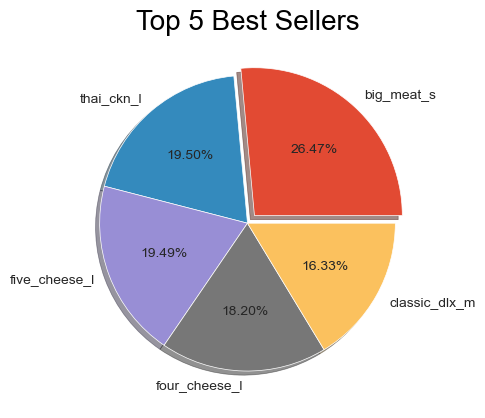

In [207]:
e = [0.07, 0, 0, 0, 0]
plt.pie(best_sellers["total sold"],
        labels=best_sellers["pizza_id"],
        autopct="%.2f%%",
        explode=e,
        shadow=True)
plt.title("Top 5 Best Sellers",
          fontsize=20,
          color="black")
plt.xlabel("")
plt.ylabel("")
print("Here is a graphic of the top 5 best selling pizzas.")

We can also take a look at the 10 least selling pizzas as well. This can potentially help the owner decide if he wants to cut the least selling products.

In [208]:
ten_least_selling = order_details.groupby(["pizza_id"])["quantity"].sum().sort_values(ascending=True)[:10].reset_index()
ten_least_selling = ten_least_selling.rename(columns= {"quantity": "total sold"})
ten_least_selling

,pizza_id,total sold
0,the_greek_xxl,28
1,green_garden_l,95
2,ckn_alfredo_s,96
3,calabrese_s,99
4,mexicana_s,162
5,ckn_alfredo_l,188
6,ital_veggie_l,190
7,ital_supr_s,196
8,the_greek_l,255
9,spinach_supr_m,267


Lets visualize those results in a bar graph.

The XXL Greek pizza is the least selling pizza with 28 sold.


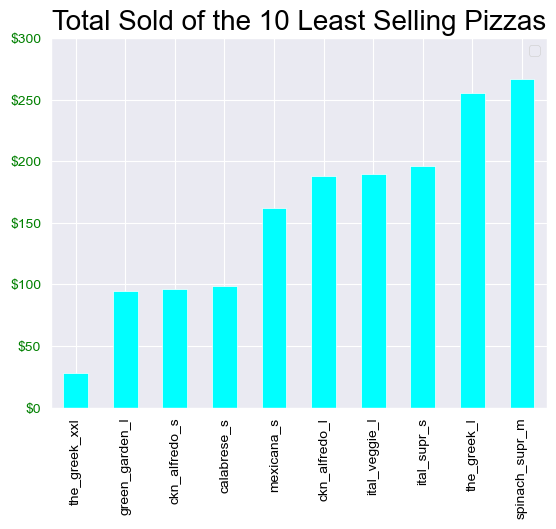

In [210]:
ten_least_selling.plot(kind="bar",
                       x="pizza_id",
                       y="total sold",
                       color="cyan")
plt.title("Total Sold of the 10 Least Selling Pizzas",
          color="black",
          fontsize=20)
plt.legend("")
plt.xlabel("")
sold = list(range(0, 350, 50))
plt.yticks(sold, [f"${s}" for s in sold],
           color="green")
plt.xticks(color="black")
print("The XXL Greek pizza is the least selling pizza with 28 sold.")

Ok, now we have a visualization of the 10 least selling pizzas. This information may be helpful for the owner. We can now move on to the next business question.

So to answer our next question, we will need to join two different tables to fetch the necessary columns for our calculations. To do this, we will use the merge function.

How much money did we make this year?

In [214]:
orderdetails_pizza = pd.merge(order_details, pizzas, how="inner", on="pizza_id")
orderdetails_pizza.head(3) 

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25


Perfect! We now have a dataframe with both of the neccessary tables combined for our analysis. Lets continue to answer the question. 

In [224]:
od_p = orderdetails_pizza.groupby(["pizza_id", "order_id"])["price"].sum().reset_index()
od_p
total_year_sales = od_p["price"].sum()
print(f"The total amount of money that was made for the year was ${total_year_sales}.")


The total amount of money that was made for the year was $801944.7.


Ok, now that we have our answer for that question, lets move on to the owners next question. 

Can we identify any seasonality in the sales?

In [240]:
pizza_orderdetails = pd.merge(pizzas, order_details, how="inner", on="pizza_id")
pizza_orderdetails.head()
pizzas_orderdetails_orders = pd.merge(pizza_orderdetails, orders, how="inner", on="order_id")
pizzas_orderdetails_orders
seasonality = pizzas_orderdetails_orders.groupby(["month_number"])["price"].sum()
seasonality.reset_index()

,month_number,price
0,1,68472.70
1,2,64067.40
2,3,69198.00
3,4,67286.20
4,5,69939.35
5,6,66796.30
6,7,71027.45
7,8,67068.80
8,9,63018.00
9,10,62566.50


Lets visualize the total sales for the year by month.

The graph shows us that the month of July has the highest total sales, while the month of October has the lowest total sales.


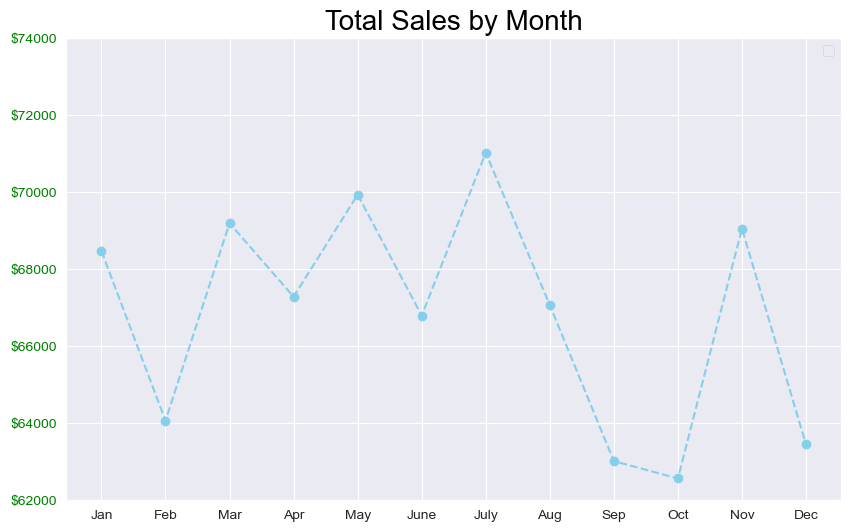

In [247]:
plt.figure(figsize=(10,6))
seasonality.plot(kind="line",
                 color="skyblue",
                 linestyle="--",
                 marker="o",
                 label="line with marker")
plt.title("Total Sales by Month",
          fontsize=20,
          color="black")
plt.legend("")
plt.xlabel("")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
           ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])
cash = list(range(62000, 75000, 2000))
plt.yticks(cash, [f"${c}" for c in cash], 
           color="green")
plt.ylabel("")
print("The graph shows us that the month of July has the highest total sales, while the month of October has the lowest total sales.")

Recommendations: 

I suggest cutting cost by removing the bottom 10 selling pizzas from the menu. I would also suggest that to increase business, the owner can possibly run promotions during the months where total sales are below satisfaction. Perhaps offer buy 2 pizzas, get a third free or buy 1 large pizza, get another one discounted. 